# Purpose:
Like the notebook concentric_distributions, this generates distributions for clustering exercises.  These though are simple globulars with minimal overlaps.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import math
%matplotlib inline

# curveddistr
This function returns a distribution in x,y spacebased on a calculated normal distribution about the polar coordinates theta and rho. 

In [27]:
def colorByNumericLabel(df,label_field):
    def mkcolor(mn,mx,shift,value):
        value = float(value) + float(shift)
        mdp = (float(mx) - float(mn)) / 2.00
        r,g,b = 0.0, 0.0, 0.0
        if value < mdp:
            # green --> red scale section
            g = (mdp-value)/mdp
            r = 1.00 - g
        else:
            # red --> blue scale section
            r = 1.00 - (value-mdp)/mdp
            b = 1.00 - r
        return (r,g,b)
    
    values = list(df[label_field])
    
    mn = np.min(df[label_field])
    mx = np.max(df[label_field])
    
    shift = max( 0, -mn)
    shift = max( shift, -(mx+shift) )
    
    shift = [shift] * len(values)
    mn = [mn] * len(values)
    mx = [mx] * len(values)
    
    
    return list( map( mkcolor, mn, mx, shift, values) )



In [4]:
def distorted_normal_globular_dist(rho_std, elongate, N):
    # creates a distribution normal in rho with rho_mean==0 and
    # rho_std provided by user.
    # theta is purely random.  
    # said distribution is then distorted such that
    # y -coords are multiplied by elongate
    # creates a 'shotgun' blast pattern ellipse when elongate != 1.00
    theta = 2.00 * np.random.random(N) * np.pi 
    rho = np.random.normal(0.00, rho_std, N)
    x = rho * np.cos(theta)
    y = rho * np.sin(theta) * elongate
    return x, y

def distored_random_globular_dist(rho_max, elongate, N):
    # creates a distribution randomly on rho between (0,rho_max)
    # theta is purely random.  
    # said distribution is then distorted such that
    # y -coords are multiplied by elongate
    # creates a pure, clean ellipse when elongate != 1.00
    theta = 2.00 * np.random.random(N) * np.pi 
    rho = np.random.random(N) * rho_max
    x = rho * np.cos(theta)
    y = rho * np.sin(theta) 
    y = y * elongate
    return x, y

def rotate_shift(theta, xshift, yshift, x, y):
    # takes the x, y distribution
    # rotates by theta and shifts as specified.
    xorig, yorig = x, y
    if theta != 0.00:
        x = xorig * np.cos(theta) - yorig * np.sin(theta)
        y = yorig * np.sin(theta) + xorig * np.sin(theta)
    return x + xshift, y + yshift

In [9]:
def encapsulate_distri_gen(params):
    if params['mode'] == 'normal':
        rho_std, elongate, N = params['rho_std'], params['elongate'], params['N']
        x, y = distored_normal_globular_dist(rho_std, elongate, N)
    elif params['mode'] == 'random':
        rho_max, elongate, N = params['rho_max'], params['elongate'], params['N']
        x, y = distored_normal_globular_dist(rho_max, elongate, N)
    theta, xshift, yshift = params['theta'], params['xshift'], params['yshift']
    x, y = rotate_shift(theta, xshift, yshift, x, y)
    df = pd.DataFrame.from_dict({"x":x,"y":y})
    df['label'] = params['label']
    return df

(-5, 5)

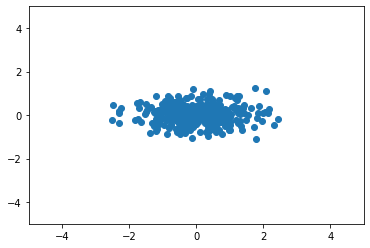

In [8]:
rho_std, elongate, N = 1, 0.5, 500
x, y = distored_normal_globular_dist(rho_std, elongate, N)

theta, xshift, yshift = 0,0,0
x, y = rotate_shift(theta, xshift, yshift, x, y)

plt.scatter(x,y)
# plt.scatter(x1,y1)
plt.xlim(-5,5)
plt.ylim(-5,5)

(-5, 5)

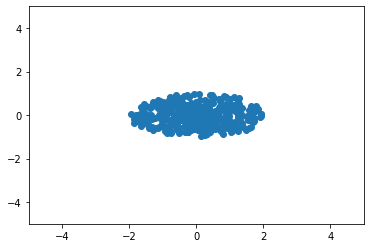

In [7]:
rho_max, elongate, N = 2.0, 0.5, 500
x, y = distored_random_globular_dist(rho_max, elongate, N)

theta, xshift, yshift = 0,0,0
x, y = rotate_shift(theta, xshift, yshift, x, y)

plt.scatter(x,y)
# plt.scatter(x1,y1)
plt.xlim(-5,5)
plt.ylim(-5,5)

In [81]:
label = 0

params = {'elongate':0.5,'theta':0,'xshift':0,'yshift':0,'N':500}
params['mode'] = 'normal'
params['rho_std'] = 1.00
params['label'] = label
p = [params]

label = label + 1
params = {'elongate':0.5,'theta':np.pi/3.00,'xshift':5.00,'yshift':4.0,'N':500}
params['mode'] = 'normal'
params['rho_std'] = 2.00
params['label'] = label
p.append(params)

label = label + 1
params = {'elongate':0.75,'theta':np.pi/4.00,'xshift':5.00,'yshift':-4.0,'N':500}
params['mode'] = 'normal'
params['rho_std'] = 1.00
params['label'] = label
p.append(params)

label = label + 1
params = {'elongate':0.25,'theta': np.pi/4,'xshift':-5.0,'yshift':-5.0,'N':500}
params['mode'] = 'random'
params['rho_max'] = 1.00
params['label'] = label
p.append(params)

label = label + 1
params = {'elongate':0.25,'theta': np.pi/8,'xshift':0,'yshift':5.0,'N':500}
params['mode'] = 'random'
params['rho_max'] = 0.7500
params['label'] = label
p.append(params)

label = label + 1
params = {'elongate':1.00,'theta': 0,'xshift':-5.0,'yshift':5.0,'N':500}
params['mode'] = 'random'
params['rho_max'] = 1.00
params['label'] = label
p.append(params)

df = pd.concat(list( map( encapsulate_distri_gen, p ) ) )

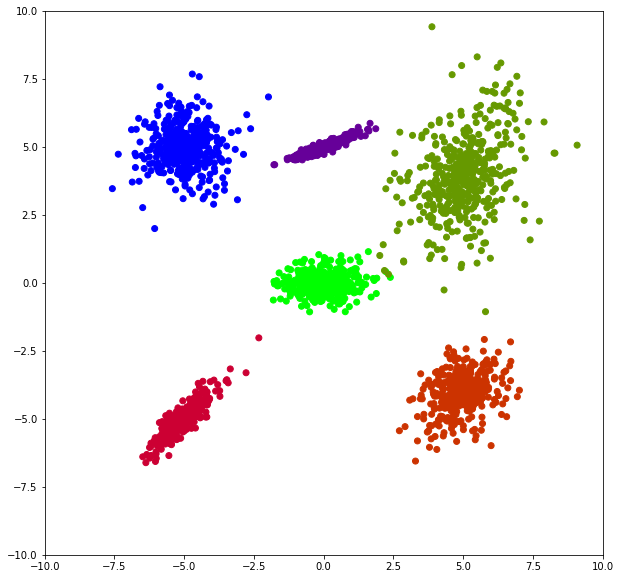

In [82]:
plt.figure(figsize=(10,10))
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(df.x,df.y, c=colorByNumericLabel(df,'label') )

In [83]:
df[['label','x','y']].to_csv('globular_distributions.csv',index=False,sep=",")